In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import patsy as pat
import sklearn.linear_model as sk_lmod
import sklearn.model_selection as sk_mod_sel
import sklearn.metrics as sk_metrics

import my_functions


##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych niezależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

data frame z scores.csv
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

Użycie metody head:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Użycie metody describe:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Kształt tablicy:
(25, 2)



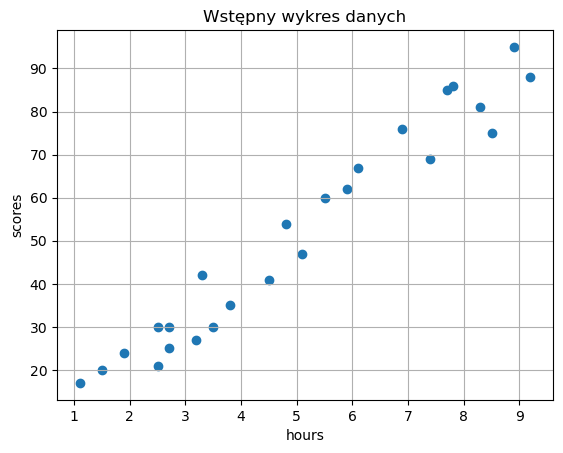

In [28]:
# 1 Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.

# 2 Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
df_scores = pd.read_csv(os.path.join("../data/SCORES.csv"))

print("data frame z scores.csv")
print(df_scores)
print()

print("Użycie metody head:")
print(df_scores.head())
print()

print("Użycie metody describe:")
print(df_scores.describe())
print()

print("Kształt tablicy:")
print(df_scores.shape)
print()

# 3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
hours = df_scores["Hours"]
scores = df_scores["Scores"]

plt.scatter(hours, scores)
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("Wstępny wykres danych")
plt.grid()
plt.show()


In [29]:
# 4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)

X = hours
y = scores
X_train, X_test, y_train, y_test = sk_mod_sel.train_test_split(X, y, train_size=0.3)

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train)

X_test = np.array(np.array(X_test)).reshape(-1, 1)
y_test = np.array(y_test)



In [30]:
# 5. Utwróz model regresji liniowej za pomocą sklearn.
model = sk_lmod.LinearRegression().fit(X_train, y_train)


In [31]:
#6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
coef_str = model.coef_[0]
intercept_str = model.intercept_

print("wyliczone wskaźniki dla modelu: coef_ :")
print(coef_str)
print("oraz intercept_ :")
print(intercept_str)

wyliczone wskaźniki dla modelu: coef_ :
10.074307817589577
oraz intercept_ :
2.7108102605863067


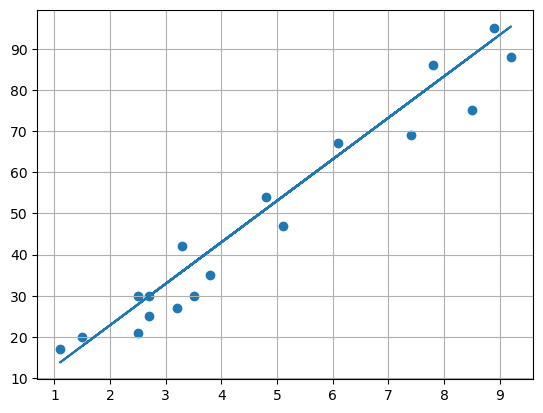

In [32]:
# 7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
out = model.predict(X_test)

plt.plot(X_test, out)
plt.scatter(X_test, y_test)
plt.grid()

plt.show()

In [33]:
# 9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

print(f"Średni błąd bezwzględny: {sk_metrics.mean_absolute_error(y_test, out)}"  )
print(f"Pierwiastek błędu średniokwadratowego: {sk_metrics.mean_squared_error(y_test, out, squared=False)}" )
print(f"Błąd średniokwadratowy: {sk_metrics.mean_squared_error(y_test, out)}" )

Średni błąd bezwzględny: 5.363056460369165
Pierwiastek błędu średniokwadratowego: 6.1789989209506215
Błąd średniokwadratowy: 38.180027665108945


In [34]:
# 10. Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

df_sbp = pd.read_csv(os.path.join("../data/SBP.csv"))

data frame z sbp.csv
    Age  SBP
0    60  117
1    61  120
2    74  145
3    57  129
4    63  132
5    68  130
6    66  127
7    77  163
8    63  136
9    54  115
10   63  118
11   76  132
12   60  111
13   61  112
14   65  147
15   79  138
16   69  141
17   56  124
18   62  122

Użycie metody head:
   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132

Użycie metody describe:
             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000

Kształt tablicy:
(19, 2)



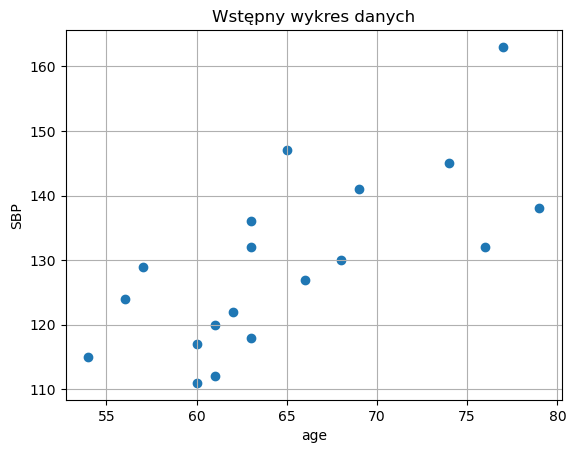

In [35]:

print("data frame z sbp.csv")
print(df_sbp)
print()

print("Użycie metody head:")
print(df_sbp.head())
print()

print("Użycie metody describe:")
print(df_sbp.describe())
print()

print("Kształt tablicy:")
print(df_sbp.shape)
print()

# 3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
age = df_sbp["Age"]
sbp = df_sbp["SBP"]

plt.scatter(age, sbp)
plt.xlabel("age")
plt.ylabel("SBP")
plt.title("Wstępny wykres danych")
plt.grid()
plt.show()

In [36]:
# 4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)

X = age
y = sbp
X_train, X_test, y_train, y_test = sk_mod_sel.train_test_split(X, y, train_size=0.3)

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train)

X_test = np.array(np.array(X_test)).reshape(-1, 1)
y_test = np.array(y_test)


In [37]:
# 5. Utwróz model regresji liniowej za pomocą sklearn.

model = sk_lmod.LinearRegression().fit(X_train, y_train)

In [38]:
#6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?

coef_str = model.coef_
intercept_str = model.intercept_

print("wyliczone wskaźniki dla modelu: coef_ :")
print(coef_str)
print("oraz intercept_ :")
print(intercept_str)

wyliczone wskaźniki dla modelu: coef_ :
[1.35119048]
oraz intercept_ :
42.63690476190477


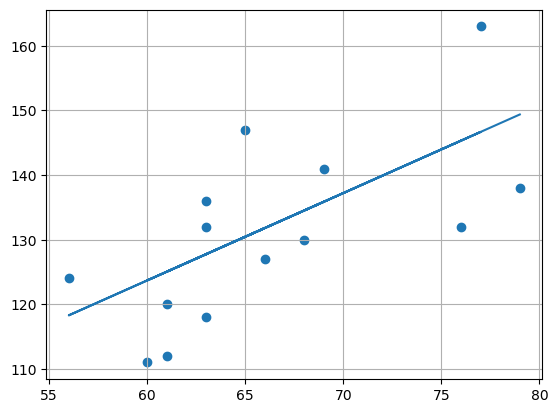

In [39]:
# 7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
out = model.predict(X_test)

plt.plot(X_test, out)
plt.scatter(X_test, y_test)
plt.grid()

plt.show()

In [40]:
# 9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).
print(f"Średni błąd bezwzględny: {sk_metrics.mean_absolute_error(y_test, out)}"  )
print(f"Pierwiastek błędu średniokwadratowego: {sk_metrics.mean_squared_error(y_test, out, squared=False)}" )
print(f"Błąd średniokwadratowy: {sk_metrics.mean_squared_error(y_test, out)}" )

Średni błąd bezwzględny: 9.3422619047619
Pierwiastek błędu średniokwadratowego: 10.309891162682662
Błąd średniokwadratowy: 106.29385578636206


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [41]:
df_petrol = pd.read_csv(os.path.join("../data/PETROL.csv"))

In [42]:

print("data frame z scores.csv")
print(df_petrol)
print()

print("Użycie metody head:")
print(df_petrol.head())
print()

print("Użycie metody describe:")
print(df_petrol.describe())
print()

print("Kształt tablicy:")
print(df_petrol.shape)
print()



data frame z scores.csv
    Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.00             3571                   1976   
1               9.00             4092                   1250   
2               9.00             3865                   1586   
3               7.50             4870                   2351   
4               8.00             4399                    431   
5              10.00             5342                   1333   
6               8.00             5319                  11868   
7               8.00             5126                   2138   
8               8.00             4447                   8577   
9               7.00             4512                   8507   
10              8.00             4391                   5939   
11              7.50             5126                  14186   
12              7.00             4817                   6930   
13              7.00             4207                   6580   
14              

['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy', 'Zuzycie_paliwa']
data frame 
    Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.00             3571                   1976   
1               9.00             4092                   1250   
2               9.00             3865                   1586   
3               7.50             4870                   2351   
4               8.00             4399                    431   
5              10.00             5342                   1333   
6               8.00             5319                  11868   
7               8.00             5126                   2138   
8               8.00             4447                   8577   
9               7.00             4512                   8507   
10              8.00             4391                   5939   
11              7.50             5126                  14186   
12              7.00             4817 

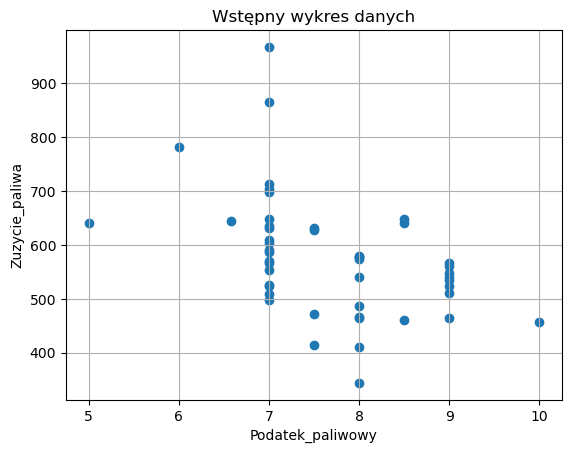

wyliczone wskaźniki dla modelu: coef_ :
-77.35000000000002
oraz intercept_ :
1186.7250000000001


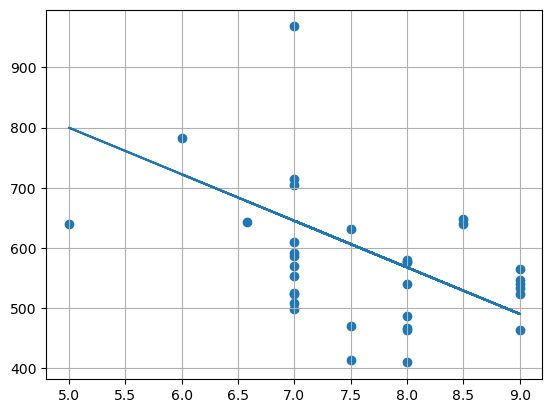

Średni błąd bezwzględny: 85.65917647058825
Pierwiastek błędu średniokwadratowego: 106.3923655410094
Błąd średniokwadratowy: 11319.335445411763
data frame 
    Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.00             3571                   1976   
1               9.00             4092                   1250   
2               9.00             3865                   1586   
3               7.50             4870                   2351   
4               8.00             4399                    431   
5              10.00             5342                   1333   
6               8.00             5319                  11868   
7               8.00             5126                   2138   
8               8.00             4447                   8577   
9               7.00             4512                   8507   
10              8.00             4391                   5939   
11              7.50             5126                  14186   
12           

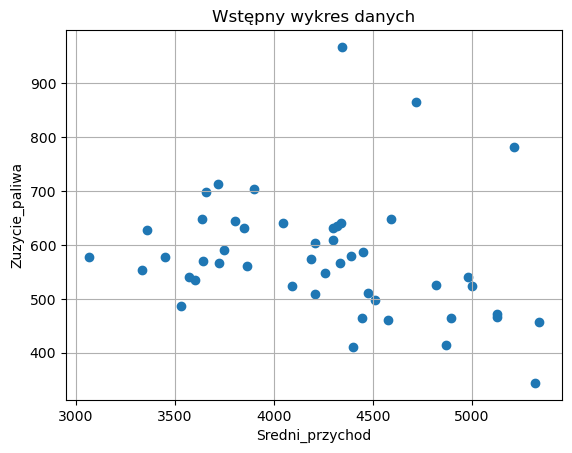

wyliczone wskaźniki dla modelu: coef_ :
0.007019938771719822
oraz intercept_ :
559.3169166632961


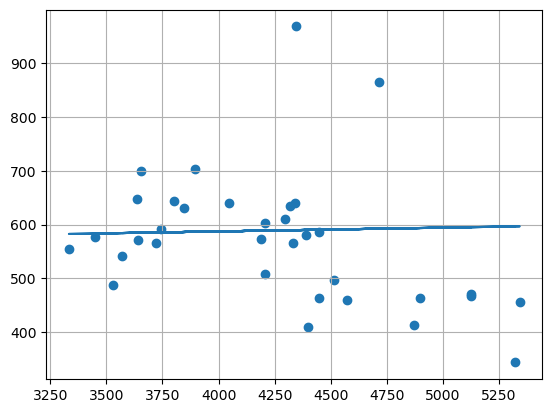

Średni błąd bezwzględny: 90.09730622379841
Pierwiastek błędu średniokwadratowego: 123.70694680912591
Błąd średniokwadratowy: 15303.408688835907
data frame 
    Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.00             3571                   1976   
1               9.00             4092                   1250   
2               9.00             3865                   1586   
3               7.50             4870                   2351   
4               8.00             4399                    431   
5              10.00             5342                   1333   
6               8.00             5319                  11868   
7               8.00             5126                   2138   
8               8.00             4447                   8577   
9               7.00             4512                   8507   
10              8.00             4391                   5939   
11              7.50             5126                  14186   
12          

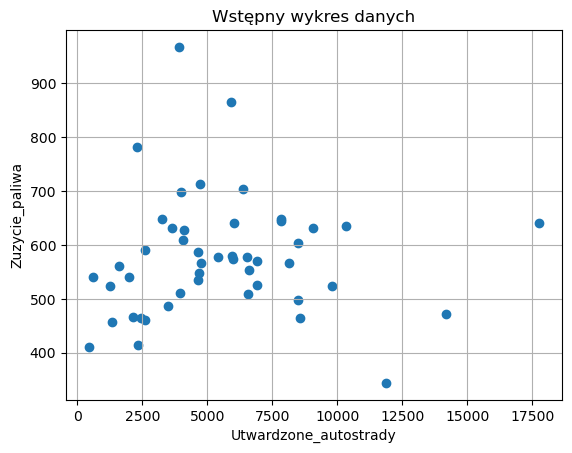

wyliczone wskaźniki dla modelu: coef_ :
0.003118235711254725
oraz intercept_ :
542.0925746195682


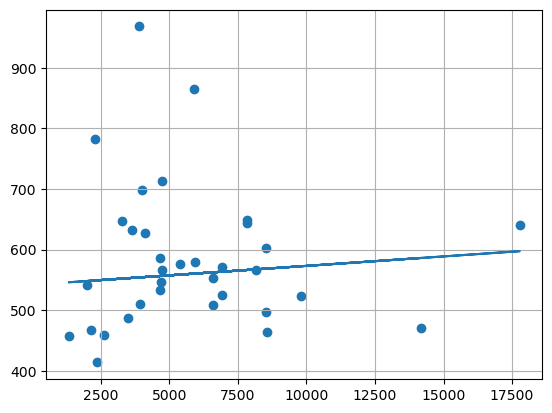

Średni błąd bezwzględny: 82.66541116787657
Pierwiastek błędu średniokwadratowego: 119.577408223851
Błąd średniokwadratowy: 14298.756557533507
data frame 
    Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.00             3571                   1976   
1               9.00             4092                   1250   
2               9.00             3865                   1586   
3               7.50             4870                   2351   
4               8.00             4399                    431   
5              10.00             5342                   1333   
6               8.00             5319                  11868   
7               8.00             5126                   2138   
8               8.00             4447                   8577   
9               7.00             4512                   8507   
10              8.00             4391                   5939   
11              7.50             5126                  14186   
12            

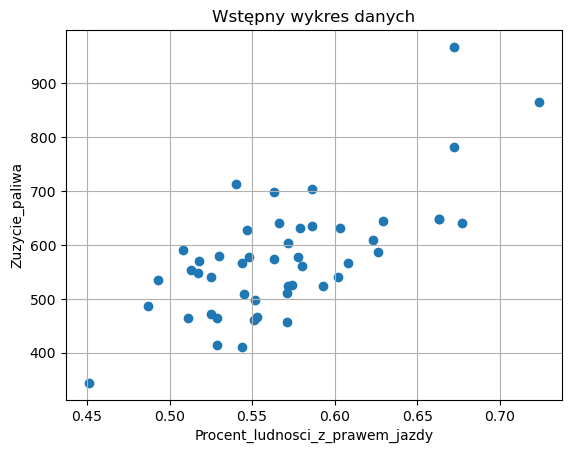

wyliczone wskaźniki dla modelu: coef_ :
816.9710169207567
oraz intercept_ :
95.86940861115795


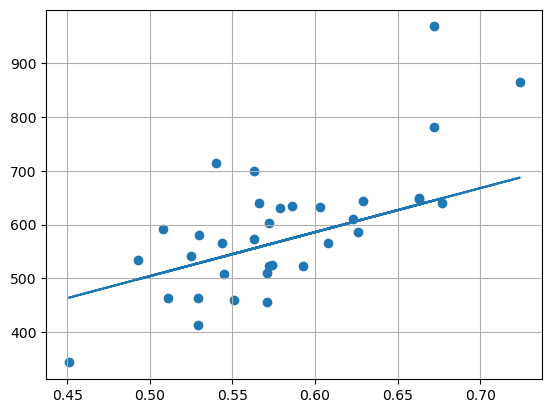

Średni błąd bezwzględny: 69.1007903580263
Pierwiastek błędu średniokwadratowego: 94.10229016415725
Błąd średniokwadratowy: 8855.241014139247


In [43]:
cols_names = df_petrol.columns.tolist()
print(cols_names)
# # 3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
predictors = cols_names[:-1]
out = cols_names[-1]

for name in predictors:
    my_functions.print_model("../data/PETROL.csv", f"{name}", out)


In [44]:
# inne podejście

df_petrol = pd.read_csv(os.path.join("../data/PETROL.csv"))
petrol_cols = df_petrol.columns.tolist()

print("petrol data frame")
print(df_petrol)
print()

print("Użycie metody head:")
print(df_petrol.head())
print()

print("Użycie metody describe:")
print(df_petrol.describe())
print()

print("Kształt tablicy:")
print(df_petrol.shape)
print()



petrol data frame
    Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.00             3571                   1976   
1               9.00             4092                   1250   
2               9.00             3865                   1586   
3               7.50             4870                   2351   
4               8.00             4399                    431   
5              10.00             5342                   1333   
6               8.00             5319                  11868   
7               8.00             5126                   2138   
8               8.00             4447                   8577   
9               7.00             4512                   8507   
10              8.00             4391                   5939   
11              7.50             5126                  14186   
12              7.00             4817                   6930   
13              7.00             4207                   6580   
14              7.00  

In [45]:
output_data_name = petrol_cols[-1]
predictor_names  = petrol_cols[:-1]

predictors = df_petrol[predictor_names]
output_data_name = df_petrol[output_data_name]

X = predictors
y = output_data_name
s = len(predictor_names)
X_train, X_test, y_train, y_test = sk_mod_sel.train_test_split(X, y, train_size=0.3)

X_train = np.array(X_train).reshape(-s, s)
y_train = np.array(y_train)

X_test = np.array(np.array(X_test)).reshape(-s, s)
y_test = np.array(y_test)


In [46]:
model = sk_lmod.LinearRegression().fit(X_train, y_train)


In [47]:
coef_str = model.coef_
intercept_str = model.intercept_

print("wyliczone wskaźniki dla modelu: coef_ :")
print(coef_str)
print("oraz intercept_ :")
print(intercept_str)

wyliczone wskaźniki dla modelu: coef_ :
[-5.19328975e+01 -2.60782831e-02 -9.11401188e-03  7.62078507e+02]
oraz intercept_ :
704.3939843329495


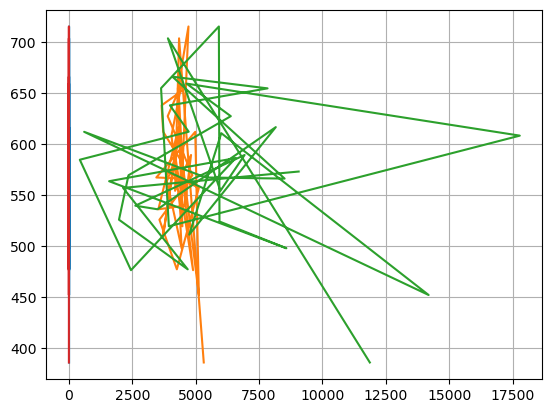

In [48]:
out = model.predict(X_test)

plt.plot(X_test, out)
# plt.scatter(X_test, y_test)
plt.grid()

plt.show()

In [49]:
print(f"Średni błąd bezwzględny: {sk_metrics.mean_absolute_error(y_test, out)}"  )
print(f"Pierwiastek błędu średniokwadratowego: {sk_metrics.mean_squared_error(y_test, out, squared=False)}" )
print(f"Błąd średniokwadratowy: {sk_metrics.mean_squared_error(y_test, out)}" )

Średni błąd bezwzględny: 63.42259957736848
Pierwiastek błędu średniokwadratowego: 83.25793613432765
Błąd średniokwadratowy: 6931.883929347781


### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [50]:
df_heart = pd.read_csv(os.path.join("../data/HEART.csv"))
my_functions.print_descritpion(df_heart)

data frame 
     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...   ... ..   
289   52    1   4      160  331   0       0      94     1      2.5     ?  ?   
290   54    0   3      130  294   0       1     100     1      0.0     2  ?   
291   56    1   4      155  342   1       0     150     1      3.0     2  ?   
292   58    0   2      180  393   0       0     110     1      1.0     2  ?   
293   65    1   4      130  275   0       1     115     1      1.0     2  ?   

    thal  num         
0      ?        

In [51]:
df_heart = df_heart.replace('?', np.NAN)

# heart_columns = df_heart.columns
# print(heart_columns)

arr1 = np.array(df_heart.isna().sum())
arr2 = np.array(df_heart.columns)

res = sorted(zip(arr1, arr2), reverse=True)[:3]
for i in res:
    df_heart = df_heart.drop(i[1], axis=1)

df_heart = df_heart.dropna()
df_heart = pd.get_dummies(df_heart, columns = ["cp","restecg"])

heart_columns = df_heart.columns
predictors = df_heart[heart_columns[:-1]]
output_data = df_heart[heart_columns[-1]]

X = predictors
y = output_data
s = len(heart_columns[:-1])

X_train, X_test, y_train, y_test = sk_mod_sel.train_test_split(X, y, shuffle=False, train_size=0.2)

# X_train = np.array(X_train).reshape(-s, s)
# y_train = np.array(y_train)
#
# X_test = np.array(np.array(X_test)).reshape(-s, s)
# y_test = np.array(y_test)

model = sk_lmod.LogisticRegression(random_state=0).fit(X_train, y_train)


C:\anaconda\Anaconda3\envs\calc2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
coef_str = model.coef_
intercept_str = model.intercept_
print("wyliczone wskaźniki dla modelu: coef_ :")
print(coef_str)
print("oraz intercept_ :")
print(intercept_str)


wyliczone wskaźniki dla modelu: coef_ :
[[-0.55352014  0.23913163 -0.02890983  0.01342866  0.00122674  0.09616621
   0.00097622 -0.10071587  0.         -0.11506865  0.41218125 -0.31796909
  -0.01818033 -0.91811079 -0.25125265]]
oraz intercept_ :
[-0.36895405]


Średni błąd bezwzględny: 4.880382775119617
Pierwiastek błędu średniokwadratowego: 0.13834289277321493
Błąd średniokwadratowy: 0.019138755980861243


C:\anaconda\Anaconda3\envs\calc2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


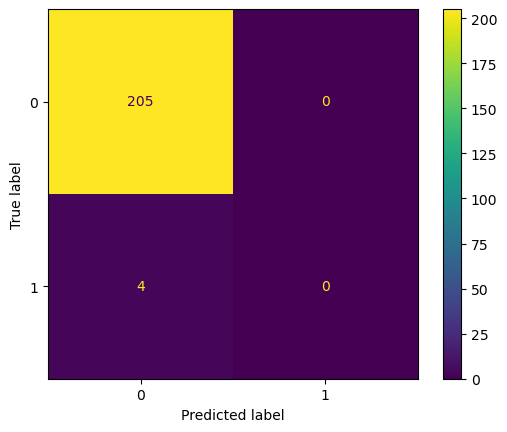

In [53]:
out = model.predict(X_test)

print(f"Średni błąd bezwzględny: {sk_metrics.mean_absolute_error(y_test, out)}"  )
print(f"Pierwiastek błędu średniokwadratowego: {sk_metrics.mean_squared_error(y_test, out, squared=False)}" )
print(f"Błąd średniokwadratowy: {sk_metrics.mean_squared_error(y_test, out)}" )

sk_metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()
